1277


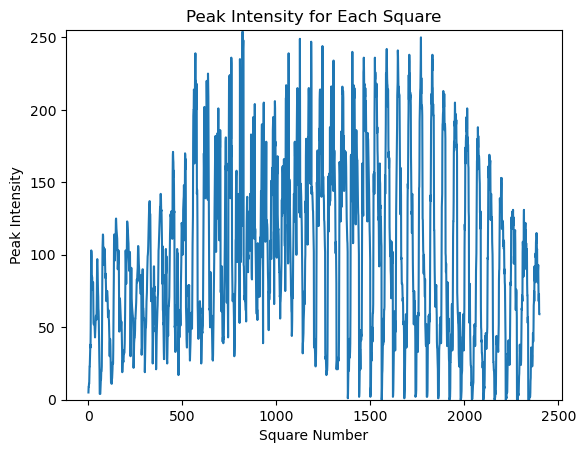

1276


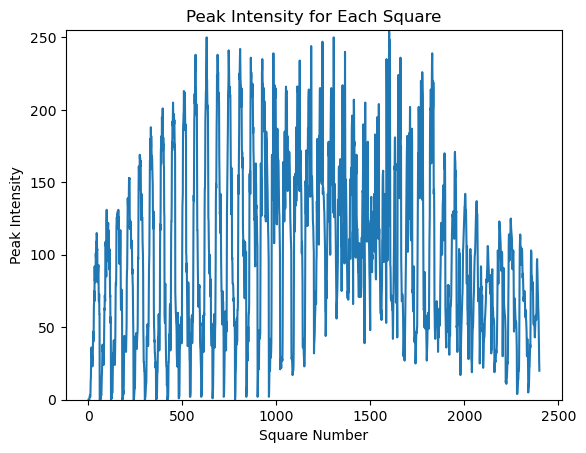

In [2]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageOps
import numpy as np
import matplotlib.pyplot as plt

class App(tk.Frame):
    def __init__(self, parent):
        tk.Frame.__init__(self, parent)
        self._createVariables(parent)
        self._createButton()
        self._createCanvas()

    def _createButton(self):
        self.button = tk.Button(self.parent, text="Choose image", command=self._openImage)
        self.button.grid(row=1, column=0, sticky='w')

    def _openImage(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            self.image = Image.open(file_path).convert("L")  # Convert to grayscale
            self.photo = ImageTk.PhotoImage(self.image)
            self.canvas.create_image(0, 0, anchor='nw', image=self.photo)
            self.parent.geometry(f"{self.image.width}x{self.image.height + 100}")
            self.canvas.config(width=self.image.width, height=self.image.height)
            self.renderGraph()  # Call renderGraph here

    def _createVariables(self, parent):
        self.parent = parent

    def _createCanvas(self):
        self.canvas = tk.Canvas(self.parent, bg="white")
        self.canvas.grid(row=2, column=0, sticky='nsew')

    def renderGraph(self):
        image_array = np.array(self.image)
        height, width = image_array.shape[0], image_array.shape[1]
    
        square_size = 10
        squares = []
        for i in range(0, height, square_size):
            for j in range(0, width, square_size):
                square = image_array[i:i+square_size, j:j+square_size]
                squares.append(square)
    
        peak_values = []
        for square in squares:
            peak_value = np.max(square)
            peak_values.append(peak_value)
    
        x = range(len(peak_values))
        y = peak_values
        test = 0
    
        grid_size = 10
        intersections = []
        for xi in range(min(x), max(x), grid_size):
            for yi in range(0, 256, grid_size): 
                for x_point, y_point in zip(x, y):
                    test = test + 1
                    if xi <= x_point < xi + grid_size and yi <= y_point < yi + grid_size:
                        intersections.append((xi, yi))
                        break
    
        plt.plot(x, y)
        plt.ylim(0, 255)
    
        print(len(intersections))
    
        plt.xlabel('Square Number')
        plt.ylabel('Peak Intensity')
        plt.title('Peak Intensity for Each Square')
        plt.show()


if __name__ == "__main__":
    root = tk.Tk()
    root.geometry("600x400")
    app = App(root)
    root.mainloop()
